In [1]:
pip install tensorflow matplot streamlit numpy pandas manim

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers


imported all the neccessary libraries here

In [3]:
data_train_path="dataset/train"
data_test_path="dataset/test"
data_val_path="dataset/validation"


set the path of each train , test and validate folder

In [4]:
img_width=180
img_height=180

scaled the images to 180x180 to make it uniform 

In [5]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 449 files belonging to 5 classes.


validation set is false coz we dont have to split our dataset we already have a validation set 

In [6]:
data_cat=data_train.class_names

In [7]:
data_cat

['barbell', 'dumbell', 'gym_ball', 'kettlebell', 'smith_machine']

In [8]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 50 files belonging to 5 classes.


In [9]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 48 files belonging to 5 classes.


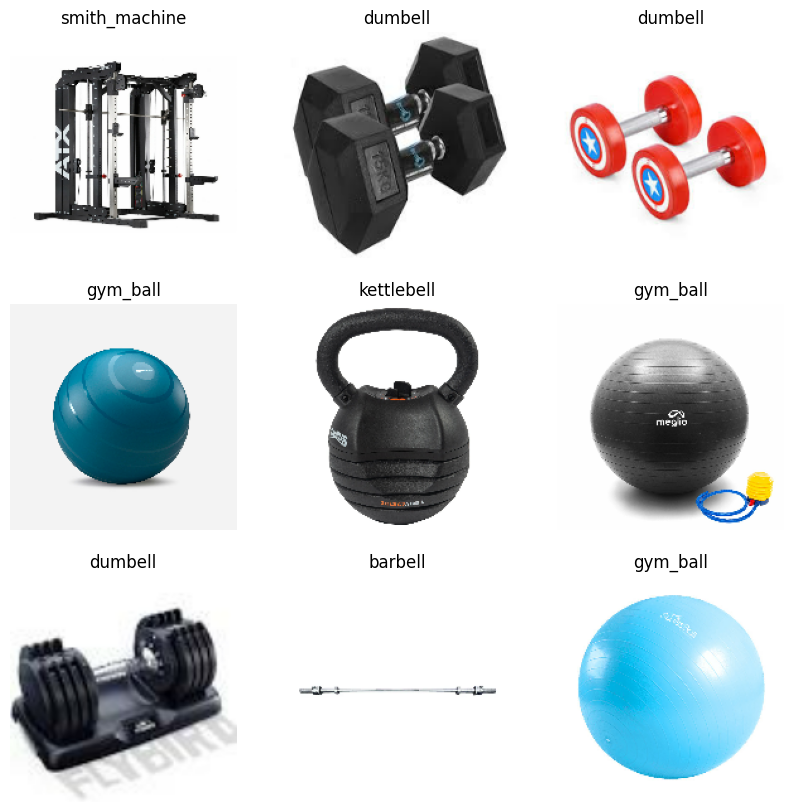

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

So here we see the images whicha are there 

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

180x180 is height of photo and 3 is for rgb

In [13]:

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(len(data_cat), activation='softmax')
])

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
epochs_size = 30
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/30


c:\Users\DELL\.conda\envs\tfGpu\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 [==============================] - 24s 250ms/step - loss: 0.9534 - accuracy: 0.6949 - val_loss: 2.5300 - val_accuracy: 0.2000
Epoch 2/30
15/15 [==============================] - 4s 131ms/step - loss: 0.3957 - accuracy: 0.8664 - val_loss: 4.0076 - val_accuracy: 0.2000
Epoch 3/30
15/15 [==============================] - 3s 131ms/step - loss: 0.2330 - accuracy: 0.9265 - val_loss: 5.1453 - val_accuracy: 0.2000
Epoch 4/30
15/15 [==============================] - 3s 134ms/step - loss: 0.1672 - accuracy: 0.9443 - val_loss: 4.6452 - val_accuracy: 0.2000
Epoch 5/30
15/15 [==============================] - 4s 134ms/step - loss: 0.0977 - accuracy: 0.9666 - val_loss: 6.3028 - val_accuracy: 0.2000
Epoch 6/30
15/15 [==============================] - 3s 124ms/step - loss: 0.0920 - accuracy: 0.9733 - val_loss: 5.6932 - val_accuracy: 0.2000
Epoch 7/30
15/15 [==============================] - 4s 134ms/step - loss: 0.0552 - accuracy: 0.9777 - val_loss: 6.9736 - val_accuracy: 0.2000
Epoch 8/30
15/15

98 is number of batches 

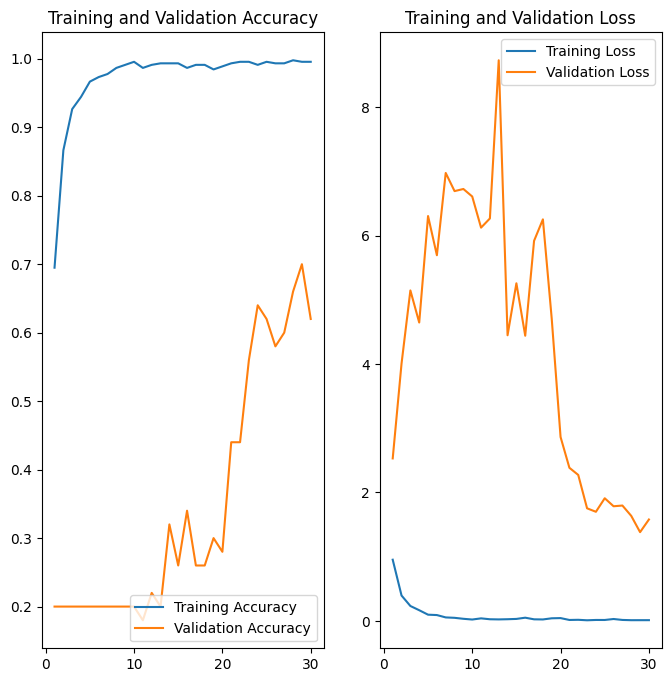

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(8, 8))

# Define epochs_range here
epochs_range = range(1, epochs_size + 1)

axs[0].plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
axs[0].plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
axs[0].legend(loc='lower right')
axs[0].set_title('Training and Validation Accuracy')

axs[1].plot(epochs_range, history.history['loss'], label='Training Loss')
axs[1].plot(epochs_range, history.history['val_loss'], label='Validation Loss')
axs[1].legend(loc='upper right')
axs[1].set_title('Training and Validation Loss')

plt.show()



In [17]:
import tensorflow as tf

# Assuming img_height and img_width are defined somewhere in your code
img_height, img_width = 180, 180  # Example values, adjust as needed

# Load the image file
user_upload = "dataset/user_upload/img2.jpg"
image = tf.keras.utils.load_img(user_upload, target_size=(img_height, img_width))

# Convert the PIL Image to a NumPy array
img_arr = tf.keras.preprocessing.image.img_to_array(image)

# Expand dimensions to add the batch size as the first dimension
img_bat = tf.expand_dims(img_arr, 0)


In [18]:
predict=model.predict(img_bat)

1/1 [==============================] - 0s 192ms/step


In [19]:
score=tf.nn.softmax(predict)

In [20]:
print('The object  in the  image is {} with accuracy of {:0.2f}%'.format(data_cat[np.argmax(score)],np.max(score)*100))

The object  in the  image is smith_machine with accuracy of 40.44%


In [21]:
model.save('imageclassification1.keras')

In [22]:
from typing import Dict

# Dictionary mapping machines to their suggested exercises for each body part
machine_exercises = {
    'barbell': {
        'upper_body': ['Bench Press', 'Barbell Rows', 'Overhead Press'],
        'lower_body': ['Squats', 'Deadlifts', 'Lunges'],
        'core': ['Russian Twists', 'Barbell Rollouts', 'Hanging Leg Raises']
    },
    'dumbbell': {
        'upper_body': ['Dumbbell Chest Press', 'Shoulder Press', 'Dumbbell Rows'],
        'lower_body': ['Dumbbell Squats', 'Dumbbell Romanian Deadlifts', 'Step-ups'],
        'core': ['Dumbbell Side Bends', 'Dumbbell Woodchoppers', 'Plank Rows']
    },
    'gym_ball': {
        'core': ['Ball Crunches', 'Plank with Leg Lifts', 'Russian Twists']
    },
    'kettlebell': {
        'upper_body': ['Kettlebell Swings', 'Kettlebell Press', 'Kettlebell Rows'],
        'lower_body': ['Kettlebell Goblet Squats', 'Kettlebell Lunges', 'Kettlebell Deadlifts'],
        'core': ['Kettlebell Russian Twists', 'Kettlebell Windmills', 'Kettlebell Turkish Get-ups']
    },
    'smith_machine': {
        'upper_body': ['Smith Machine Bench Press', 'Smith Machine Shoulder Press', 'Smith Machine Rows'],
        'lower_body': ['Smith Machine Squats', 'Smith Machine Lunges', 'Smith Machine Deadlifts']
    }
}

# Dictionary to map exercise names to their corresponding links
exercise_links = {
    'Bench Press': 'https://www.youtube.com/shorts/0cXAp6WhSj4',
    'Barbell Rows': 'https://www.youtube.com/shorts/Nqh7q3zDCoQ',
    'Overhead Press': 'https://www.youtube.com/shorts/zSU7T1zZagQ',
    'Squats': 'https://www.youtube.com/shorts/gslEzVggur8',
    'Deadlifts': 'https://www.youtube.com/shorts/8np3vKDBJfc',
    'Lunges': 'https://www.youtube.com/shorts/TwEH620Pn6A',
    'Russian Twists': 'https://www.youtube.com/watch?v=Tau0hsW8iR0',
    'Barbell Rollouts': 'https://www.youtube.com/watch?v=3C1TRMJveXo',
    'Hanging Leg Raises': 'https://www.youtube.com/shorts/2n4UqRIJyk4',
    'Dumbbell Chest Press': 'https://www.youtube.com/shorts/SidmT09GXz8',
    'Shoulder Press': 'https://www.youtube.com/shorts/dyv6g4xBFGU',
    'Dumbbell Rows': 'https://www.youtube.com/shorts/s1H87k4tAaA',
    'Dumbbell Squats': 'https://www.youtube.com/shorts/eLX_dyvooKQ',
    'Dumbbell Romanian Deadlifts': 'https://www.youtube.com/shorts/u14AwrUcwWw',
    'Step-ups': 'https://www.youtube.com/shorts/PzDbmqL6qo8Dumbbell',
    'Dumbbell Side Bends': 'https://www.youtube.com/watch?v=dL9ZzqtQI5c', 
    'Dumbbell Woodchoppers': 'https://www.youtube.com/shorts/OgQU_bbdB7c',
    'Plank Rows': 'https://www.youtube.com/watch?v=Gtc_Ns3qYYo',
    'Ball Crunches': 'https://www.youtube.com/watch?v=O4d3kd1ZLyc',
    'Plank with Leg Lifts': 'https://www.youtube.com/shorts/s_8PheAKUYk',
    'Kettlebell Swings': 'https://www.youtube.com/shorts/SR_4kUbkEaw',
    'Kettlebell Press': 'https://www.youtube.com/watch?v=eKQ0JOx_1qI',
    'Kettlebell Rows': 'https://www.youtube.com/shorts/e4OSLk1qZOQ',
    'Kettlebell Goblet Squats': 'https://www.youtube.com/shorts/dBnNCOtuGNQ',
    'Kettlebell Lunges': 'https://www.youtube.com/shorts/otd2YQk7osI',
    'Kettlebell Deadlifts': 'https://www.youtube.com/shorts/I7q_EPywprs',
    'Kettlebell Russian Twists': 'https://www.youtube.com/shorts/BA-uP_-bVE8',
    'Kettlebell Windmills': 'https://www.youtube.com/shorts/OVNXkKsfy7o',
    'Kettlebell Turkish Get-ups': 'https://www.youtube.com/shorts/-dfk79o6iHI',
    'Smith Machine Bench Press': 'https://www.youtube.com/shorts/G-jT0m0nvx8',
    'Smith Machine Shoulder Press': 'https://www.youtube.com/shorts/QWdaC7rQ-FM',
    'Smith Machine Rows': 'https://www.youtube.com/shorts/qivPkcDI0s0',
    'Smith Machine Squats': 'https://www.youtube.com/shorts/xU4cuTffVZc',
    'Smith Machine Lunges': 'https://www.youtube.com/shorts/dFMa-mmZ6A8',
    'Smith Machine Deadlifts': 'https://www.youtube.com/shorts/Bhg9IvQzsCI'
}

# Function to print out available exercises based on user's choice
def suggest_exercises(machine: str, focus: str) -> None:
    if machine not in machine_exercises:
        print(f"Sorry, {machine} is not available for exercise suggestions.")
        return

    if focus not in machine_exercises[machine]:
        print(f"Sorry, {machine} cannot be used for {focus}.")
        return

    print(f"\nSuggested exercises using {machine} for {focus}:")
    for exercise in machine_exercises[machine][focus]:
        exercise_link = exercise_links.get(exercise, "Link not available")
        print(f"- {exercise}: {exercise_link}")

# Main function to display menu and prompt user
def main() -> None:

    machine_detected = data_cat[np.argmax(score)]
    print(f"The detected equipment is: {machine_detected}")

    print("\nWhat part of the body do you want to focus on?")
    print("1. Upper Body")
    print("2. Lower Body")
    print("3. Core")
    choice = input("Enter your choice (1/2/3): ")

    if choice == '1':
        focus = 'upper_body'
    elif choice == '2':
        focus = 'lower_body'
    elif choice == '3':
        focus = 'core'
    else:
        print("Invalid choice. Please enter a valid option (1/2/3).")
        return

    suggest_exercises(machine_detected, focus)

if __name__ == "__main__":
    main()


The detected equipment is: smith_machine

What part of the body do you want to focus on?
1. Upper Body
2. Lower Body
3. Core

Suggested exercises using smith_machine for lower_body:
- Smith Machine Squats: https://www.youtube.com/shorts/xU4cuTffVZc
- Smith Machine Lunges: https://www.youtube.com/shorts/dFMa-mmZ6A8
- Smith Machine Deadlifts: https://www.youtube.com/shorts/Bhg9IvQzsCI


In [23]:
!pip install manim

